# Robot Javelin

Two players, A and B, independently draw a number uniformly from $[0,1]$. After observing only their own draws $x$ and $y$, they simultaneously decide whether to keep their draw or redraw it once from the same distribution. The player with the largest final number wins.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## 1. Nash equilibrium

Since larger numbers are always preferred, an optimal strategy must be a cutoff rule: for a given threshold $t$, keep the draw if it is at least $t$, and redraw if it is below $t$. By symmetry, both players use the same threshold.

For any draw $x$ of player A, conditioning on whether player B’s draw $y$ falls below the threshold or not, her probability of winning by staying is
$$
p_1(x)
= t x + \max(0, x - t),
$$
whereas her probability of winning by redrawing is
$$
p_2(x)
= t \frac{1}{2}
+ (1 - t) \frac{\frac{1}{2}(1 - t)^2}{1 - t}
= \frac{t^2 - t + 1}{2},
$$
which can be obtained by drawing the favorable regions of $[0,1]^2$ and $[0,1] \times [t,1]$.

By the indifference principle, we must have $p_1(t) = p_2(t)$, hence
$$
t^2 + t - 1
= 0,
$$
which yields
$$
t
= \frac{-1 + \sqrt{5}}{2}.
$$

By symmetry, each player wins with probability $\frac{1}{2}$. This can also be verified by direct computation.

The probability of winning conditional on $x < t$ is that of winning by redrawing,
$$
\frac{t^2 - t + 1}{2},
$$
and the probability of winning conditional on $x > t$ is
$$
t \frac{(1 - t) t + \frac{1}{2}(1 - t)^2}{1 - t}
+ (1 - t) \frac{1}{2}
= \frac{1 + t^2}{2},
$$
which can be obtained by drawing the favorable regions of $[t,1] \times [0,1]$ and $[t,1]^2$, so the general probability is
$$
p_A
= p_B
= t \frac{t^2 - t + 1}{2}
+ (1 - t) \frac{1 + t^2}{2}
= \frac{1}{2}.
$$

The expected final score of either player is
$$
E_A
= E_B
= t \frac{1}{2} + (1 - t) \frac{1 + t}{2}
= \frac{1 + t - t^2}{2}
= \frac{2t}{2}
= t.
$$

## 2. Player B's advantage

Now player B has access to a one-bit signal about player A's initial draw: before deciding whether to redraw, she learns whether player A's draw exceeds a chosen threshold $d$, which she selects to maximize her probability of winning.

### 1. Case $d = t$

If player B learns that $\boxed{x < t}$, then her probability of winning by redrawing is
$$
\frac{1}{2},
$$
whereas her probability of winning by staying is
$$
y.
$$
In this case, the indifference point is $y_1 = \frac{1}{2}$.

If player B learns that $\boxed{x > t}$, then her probability of winning by redrawing is
$$
\frac{1 - t}{2},
$$
whereas her probability of winning by staying is
$$
\begin{cases}
0, & y < t, \\
\frac{y - t}{1 - t}, & y > t.
\end{cases}
$$
In this case, the indifference point $y_2$ satisfies
$$
\frac{y_2 - t}{1 - t}
= \frac{1 - t}{2},
$$
so
$$
y_2 = \frac{1}{2}(1 - t)^2 + t
= \frac{1 + t^2}{2}.
$$

The probability of winning conditional on $\boxed{x < t}$ is
$$
p_1
= y_1 \frac{1}{2}
+ \int_{y_1}^1 y \, dy.
$$

The probability of winning conditional on $\boxed{x > t}$ is
$$
p_2
= y_2 \frac{1}{2}(1 - t)
+ \int_{y_2}^1 \frac{y - t}{1 - t} \, dy.
$$

The probability of winning is
$$
p
= t p_1
+ (1 - t) p_2
= \frac{9 - 8 t}{8}.
$$

In [2]:
d = sp.symbols('d')
y = sp.symbols('y')
t = (sp.sqrt(5) - 1)/2

In [3]:
y1 = sp.Rational(1, 2)
y2 = (1 + t**2) / 2

p1 = y1 * sp.Rational(1, 2) + sp.integrate(y, (y, y1, 1))
p2 = y2 * sp.Rational(1, 2) * (1 - t) + sp.integrate((y - t) / (1 - t), (y, y2, 1))
p = t * p1 + (1 - t) * p2

p_s = sp.simplify(p)
p1_s = sp.simplify(p1)
p2_s = sp.simplify(p2)

print("Probability of player B winning conditioned on x<=t:", p1_s, "=", float(p1_s))
print("Probability of player B winning conditioned on x>=t:", p2_s, "=", float(p2_s))
print("Overall probability of winning:", p_s, "=", float(p_s))

Probability of player B winning conditioned on x<=t: 5/8 = 0.625
Probability of player B winning conditioned on x>=t: 7/8 - sqrt(5)/4 = 0.31598300562505255
Overall probability of winning: 13/8 - sqrt(5)/2 = 0.5069660112501051


### 2. Case $d \leq t$

If player B learns that $\boxed{x < d}$, then her probability of winning by redrawing is
$$
\frac{1}{2},
$$
whereas her probability of winning by staying is
$$
y.
$$
In this case, the indifference point is $y_1 = \frac{1}{2}$, which is continuous at both $d = 0$ and $d = t$.

If player B learns that $\boxed{x > d}$, then her probability of winning by redrawing is
$$
\frac{t - d}{1 - d} \frac{1}{2}
+ \frac{1 - t}{1 - d} \frac{\frac{1}{2}(1 - t)^2}{1 - t}
= \frac{1 - d - t + t^2}{2(1 - d)}.
$$
This expression is continuous at $d = 0$, where it equals $\frac{1 - t + t^2}{2}$, and at $d = t$, where it equals $\frac{1 - t}{2}$.

Her probability of winning by staying is
$$
\begin{cases}
0, & y < d, \\
\frac{t - d}{1 - d} y, & d < y < t, \\
\frac{t - d}{1 - d} y + \frac{y - t}{1 - d}, & t < y.
\end{cases}
$$
This expression is continuous at $d = 0$ and $d = t$.

In this case, the only indifference point $y_2$ that falls within range satisfies
$$
\frac{(t - d + 1) y_2 - t}{1 - d}
= \frac{1 - d - t + t^2}{2(1 - d)},
$$
so
$$
y_2
= \frac{\frac{1}{2}(1 - d - t + t^2) + t}{1 - d + t}
= \frac{1 - d + t + t^2}{2(1 - d + t)}.
$$
This expression is continuous at $d = 0$, where $y_2 = t$, and at $d = t$, where $y_2 = \frac{1 + t^2}{2}$.

The probability of winning conditional on $\boxed{x < d}$ is
$$
p_1(d)
= y_1 \frac{1}{2}
+ \int_{y_1}^1 y \, dy.
$$

The probability of winning conditional on $\boxed{x > d}$ is
$$
p_2(d)
= y_2 \frac{1 - d - t + t^2}{2(1 - d)}
+ \int_{y_2}^1 \frac{(t - d + 1)y - t}{1 - d} \, dy.
$$

The total probability of winning is
$$
p
= d p_1(d)
+ (1 - d) p_2(d).
$$

In [4]:
def max_on_interval(expr, var, a, b):
    d_expr = sp.diff(expr, var)
    critical_points = sp.solve(d_expr, var)
    candidates = [
        c for c in critical_points
        if c.is_real and a < c < b
    ] + [a, b]
    values = [(c, expr.subs(var, c)) for c in candidates]
    return max(values, key=lambda p: float(p[1]))

In [5]:
y1_L = sp.Rational(1, 2)
y2_L = (1 - d + t + t**2) / (2 * (1 - d + t))

p1_L = y1_L / 2 + sp.integrate(y, (y, y1_L, 1))
p2_L = (
    y2_L * (1 - d - t + t**2) / (2 * (1 - d))
    + sp.integrate(((t - d + 1) * y - t) / (1 - d), (y, y2_L, 1))
)
p_L = d * p1_L + (1 - d) * p2_L
p_Ls = sp.simplify(p_L.subs(t**2, 1 - t))

d_star, p_star = max_on_interval(p_Ls, d, 0, t)

print("d that maximizes probability of player B winning:", d_star, "=", float(d_star))
print("Maximized probability of player B winning:", float(p_star))

d that maximizes probability of player B winning: -1/2 + sqrt(5)/2 = 0.6180339887498949
Maximized probability of player B winning: 0.5069660112501051


### 3. Case $d \geq t$

If player B learns that $\boxed{x < d}$, then her probability of winning by redrawing is
$$
\frac{t}{d} \frac{1}{2}
+ \frac{d - t}{d} \frac{\frac{1}{2}(d - t)^2 + (1 - d)(d - t)}{d - t}
= \frac{2d - d^2 - t + t^2}{2d}.
$$
This expression is continuous at $d = t$, where it equals $\frac{1}{2}$, and at $d = 1$, where it equals $\frac{1 - t + t^2}{2}$.

Her probability of winning by staying is
$$
\begin{cases}
\frac{t}{d} y, & y < t, \\
\frac{t}{d} y + \frac{y - t}{d}, & t < y < d, \\
\frac{t}{d} y + \frac{d - t}{d}, & d < y.
\end{cases}
$$
This expression is continuous at $d = t$ and $d = 1$.

In this case, the only indifference point $y_1$ that falls within range satisfies
$$
\frac{t}{d} y_1
= \frac{2d - d^2 - t + t^2}{2d},
$$
so
$$
y_1
= \frac{2d - d^2 - t + t^2}{2t}.
$$
This expression is continuous at $d = t$, where $y_1 = \frac{1}{2}$, and at $d = 1$, where $y_1 = t$.

If player B learns that $\boxed{x > d}$, then her probability of winning by redrawing is
$$
\frac{\frac{1}{2}(1 - d)^2}{1 - d}
= \frac{1 - d}{2}.
$$
This expression is continuous at $d = t$, where it equals $\frac{1 - t}{2}$, and at $d = 1$, where it equals $0$.

Her probability of winning by staying is
$$
\begin{cases}
0, & y < d, \\
\frac{y - d}{1 - d}, & y > d.
\end{cases}
$$
This expression is continuous at $d = t$ and $d = 1$.

In this case, the only indifference point $y_2$ that falls within range satisfies
$$
\frac{y_2 - d}{1 - d}
= \frac{1 - d}{2},
$$
so
$$
y_2
= \frac{1 + d^2}{2}.
$$
This expression is continuous at $d = t$, where $y_2 = \frac{1}{2}$, and at $d = 1$, where $y_2 = 1$.

The probability of winning conditional on $\boxed{x < d}$ is
$$
p_1(d)
= y_1 \frac{2d - d^2 - t + t^2}{2d}
+ \int_{y_1}^1 \frac{t}{d} y \, dy
+ \int_t^d \frac{y - t}{d} \, dy
+ \int_d^1 \frac{d - t}{d} \, dy.
$$

The probability of winning conditional on $\boxed{x > d}$ is
$$
p_2(d)
= y_2 \frac{1 - d}{2}
+ \int_{y_2}^1 \frac{y - d}{1 - d} \, dy.
$$

The total probability of winning is
$$
p = d p_1(d)
+ (1 - d) p_2(d).
$$

In [6]:
y1_R = (2 * d - d**2 - t + t**2) / (2 * t)
y2_R = (1 + d**2) / 2

p1_R = (
    y1_R * (2 * d - d**2 - t + t**2) / (2 * d)
    + sp.integrate(t * y / d, (y, y1_R, 1))
    + sp.integrate((y - t) / d, (y, t, d))
    + sp.integrate((d - t) / d, (y, d, 1))
)
p2_R = y2_R * (1 - d) / 2 + sp.integrate((y - d) / (1 - d), (y, y2_R, 1))
p_R = d * p1_R + (1 - d) * p2_R
p_Rs = sp.simplify(p_R.subs(t**2, 1 - t))

d_star, p_star = max_on_interval(p_Rs, d, t, 1)

print("d that maximizes probability of player B winning:", d_star, "=", float(d_star))
print("Maximized probability of player B winning:", float(p_star))

d that maximizes probability of player B winning: -1/2 + sqrt(5)/2 = 0.6180339887498949
Maximized probability of player B winning: 0.5069660112501051


### 4. Conclusion

In conclusion, the probability is maximized at $d=t$. This makes sense intuitively.

In [7]:
def piecewise_numeric(exprs, intervals, var):
    fs = [sp.lambdify(var, e, 'numpy') for e in exprs]
    def f(x):
        x = np.asarray(x)
        out = np.zeros_like(x, dtype=float)
        for (a, b), g in zip(intervals, fs):
            m = (x >= a) & (x <= b)
            out[m] = g(x[m])
        return out
    return f

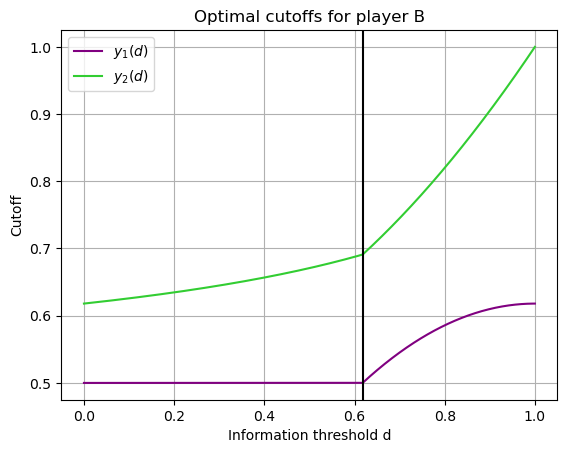

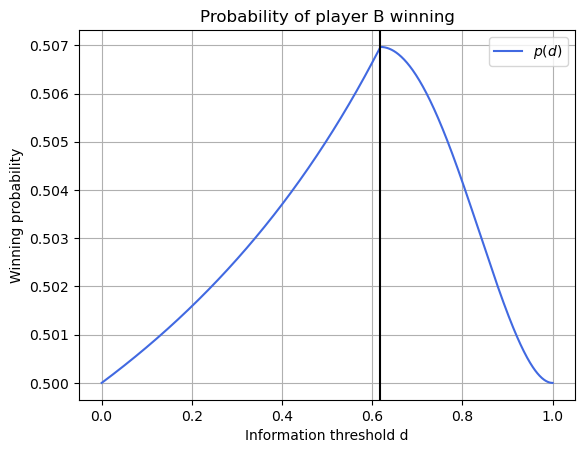

In [8]:
t_num = float(t)

intervals = [(0, t_num), (t_num, 1)]
y1_fun = piecewise_numeric([y1_L, y1_R], intervals, d)
y2_fun = piecewise_numeric([y2_L, y2_R], intervals, d)
p_fun = piecewise_numeric([p_L, p_R], intervals, d)

xs = np.linspace(1e-4, 1 - 1e-4, 800)

plt.plot(xs, y1_fun(xs), color="purple", label=r"$y_1(d)$")
plt.plot(xs, y2_fun(xs), color="limegreen", label=r"$y_2(d)$")
plt.axvline(t_num, color="black")
plt.title("Optimal cutoffs for player B")
plt.xlabel("Information threshold d")
plt.ylabel("Cutoff")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(xs, p_fun(xs), color="royalblue", label=r"$p(d)$")
plt.axvline(t_num, color="black")
plt.title("Probability of player B winning")
plt.xlabel("Information threshold d")
plt.ylabel("Winning probability")
plt.legend()
plt.grid(True)
plt.show()

The expected final score for player A remains the same, but the expected final score for player B is now
$$
E_B
= t y_1 \frac{1}{2} + t (1 - y_1) \frac{3}{4} + (1 - t) y_2 \frac{1}{2} + (1 - t) (1 - y_2) \frac{\frac{1}{2}(1 - y_2)^2}{1 - y_2}
= 1 - \frac{3}{4} t.
$$

In [9]:
E = (
    d * y1 * sp.Rational(1, 2)
    + d * (1 - y1) * sp.Rational(3, 4)
    + (1 - d) * y2 * sp.Rational(1, 2)
    + (1 - d) * (1 - y2)**2 * sp.Rational(1, 2)
)

E_s = sp.simplify(E.subs(d, t))
E_val = sp.simplify(E_s.subs(d, t))

print("Expected final score for B:", E_s, "=", float(E_val))


Expected final score for B: 11/8 - 3*sqrt(5)/8 = 0.5364745084375788


## 3. Player B's response

Now player A learns that player B has access to the one-bit signal and adjusts her strategy to maximize her probability of winning, while player B remains unaware of A's knowledge and continues to play the same strategy.

In [10]:
x = sp.symbols('x')

If $\boxed{x < t}$, then the probability of player A winning by redrawing is
$$
y_1 \frac{1}{2}
+ (1 - y_1) \frac{1}{4}
= \frac{1}{2} \frac{1}{2}
+ \frac{1}{2} \frac{1}{4}
= \frac{3}{8},
$$
whereas her probability of winning by staying is
$$
\begin{cases}
y_1 x, & x < y_1, \\
y_1 x + (x - y_1), & y_1 < x < t.
\end{cases}
$$
In this case, the only indifference point that falls within range satisfies
$$
\frac{1}{2} x_1
+ x_1
- \frac{1}{2}
= \frac{3}{8},
$$
so
$$
x_1
= \frac{7}{12}.
$$

If $\boxed{x > t}$, then the probability of player A winning by redrawing is
$$
y_2 \frac{1}{2}
+ (1 - y_2) \frac{\frac{1}{2}(1 - y_2)^2}{1 - y_2}
= \frac{1}{4} \left(1 + t^2 + \frac{1 - 2t^2 + t^4}{2}\right)
= \frac{3 + t^4}{8},
$$
whereas the probability of winning by staying is
$$
\begin{cases}
y_2 x, & t < x < y_2, \\
y_2 x + (x - y_2), & y_2 < x.
\end{cases}
$$
In this case, no indifference point falls within range, and player A should always stay.

The probability of winning conditional on $\boxed{x < t}$ is
$$
p_1
= \frac{1}{t} \left(x_1 \frac{3}{8} + \int_{x_1}^t ((y_1 + 1) x - y_1) \, dx\right).
$$

The probability of winning conditional on $\boxed{x > t}$ is
$$
p_2
= \frac{1}{1 - t} \left(\int_t^1 y_2 x \, dx + \int_{y_2}^1 (x - y_2) \, dx\right).
$$

The total probability of winning is
$$
p = t p_1
+ (1 - t) p_2.
$$


In [11]:
x1 = sp.Rational(7, 12)

p1 = (1 / t) * (
    x1 * sp.Rational(3, 8)
    + sp.integrate((y1 + 1) * x - y1, (x, x1, t))
)
p2 = (1 / (1 - t)) * (
    sp.integrate(y2 * x, (x, t, 1))
    + sp.integrate(x - y2, (x, y2, 1))
)
p = t * p1 + (1 - t) * p2

p_s = sp.simplify(p)
p1_s = sp.simplify(p1)
p2_s = sp.simplify(p2)

print("Probability of player A winning conditioned on x<=t:", p1_s, "=", float(p1_s))
print("Probability of player A winning conditioned on x>=t:", p2_s, "=", float(p2_s))
print("Overall probability of player A winning:", p_s, "=", float(p_s))

Probability of player A winning conditioned on x<=t: -287/384 + 193*sqrt(5)/384 = 0.3764612491079672
Probability of player A winning conditioned on x>=t: 1/8 + sqrt(5)/4 = 0.6840169943749475
Overall probability of player A winning: 229/192 - 5*sqrt(5)/16 = 0.49393709036464906


## 4. Conclusion

| | P(A wins) | P(B wins) |
| - | - | - |
| Part 1 | 0.5 | 0.5 | 
| Part 2 | 0.4930339887 | 0.5069660113 |
| Part 3 | 0.4939370904 | 0.5060629096 |

In the Nash equilibrium of the original game, both players to win with probability $\frac{1}{2}$ by symmetry. When player B receives additional information, this symmetry is broken and her winning probability increases. However, the gain is modest: the signal only reveals whether $x$ lies above or below the threshold $t$, and she can react only by rerolling. Specifically, player B lowers her cutoff when she learns that $x < t$ and raises it when she learns that $x > t$.

When player A becomes aware of player B's informational advantage, she can partially exploit this. In particular, on the interval $[\frac{7}{12}, t]$, where she would originally redraw, she instead stays, taking advantage of player B's lower cutoff. This adjustment slightly increases player A's winning probability, but not enough to restore symmetry.